In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
def jaccard_sim(a, b):
    unions = len(set(a).union(set(b)))
    intersections = len(set(a).intersection(set(b)))
    return intersections / unions

In [21]:
df1 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex3/keywords/keywords_YAKE_10.csv')
df1 = df1.drop(df1.columns[0],axis=1)#remove index
df = df1.drop(df1.columns[0],axis=1)#remove original para

#original_keywords = df_keywords['paragraph'].tolist()
original_keywords = df1['paragraph'].tolist()
heads = df.columns.values.tolist()
df_jacc_sim = pd.DataFrame()
for head in heads:
    jacc_sims = []
    tem_list = df[head].tolist()
    for i,j in zip(original_keywords,tem_list):
        jacc_sim = jaccard_sim(i, j)
        jacc_sims.append(jacc_sim)
    df_jacc_sim[head] = jacc_sims

In [23]:
df_jacc_sim.to_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex3/jaccard/YAKE10.csv')

In [17]:
df_jaccsim_plot = pd.DataFrame()
df_jaccsim = pd.DataFrame()
heads = df_jacc_sim.columns.values.tolist()
source = ['NLP paper','Literature','News','Encyclopedias','Social Media','Speeches','Interview','Instruction Manuals']

data_source = []
jaccsim = []
WATs = []
for head in heads:
    
    WAT = [head]*60
    tem_jaccsim = df_jacc_sim[head].tolist()
    
    i = 0
    
    for i in range(8):
        datasource = [source[i]] * 60
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            jaccsim.append(tem_jaccsim[tem_index])

        data_source = data_source + datasource
        WATs = WATs + WAT

        
df_jaccsim_plot['jacc_sim'] = jaccsim
df_jaccsim_plot['datasource'] = data_source
df_jaccsim_plot['WATs'] = WATs

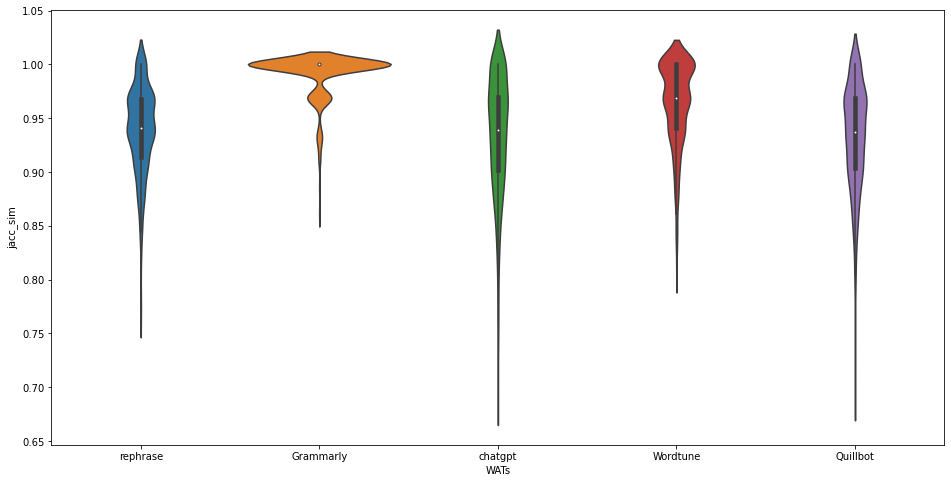

In [18]:
f= plt.subplots(1,figsize=(16,8))
c = sns.violinplot(y="jacc_sim",x= "WATs", data=df_jaccsim_plot)

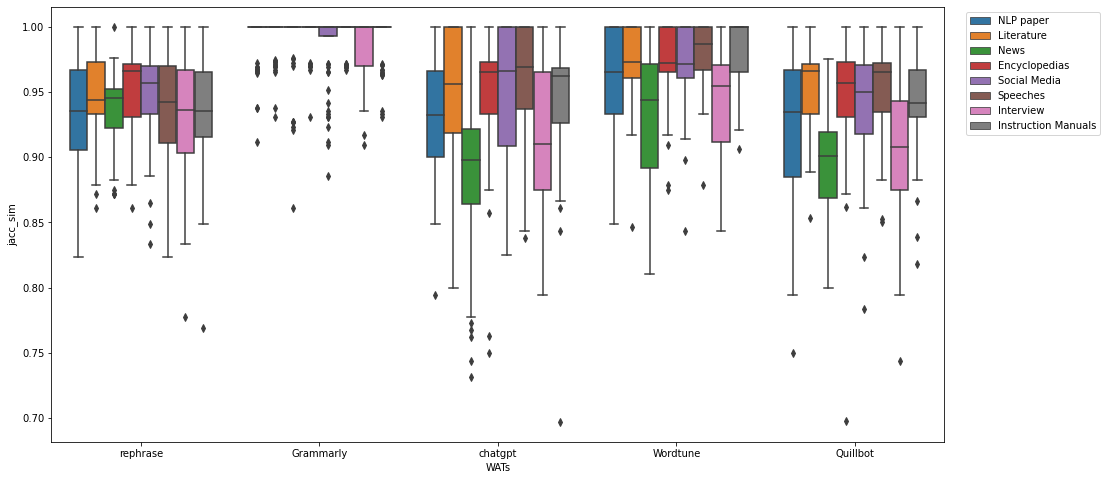

In [26]:
f = plt.subplots(1,figsize=(16,8))
a = sns.boxplot(y="jacc_sim",x= "WATs",hue="datasource", data=df_jaccsim_plot)
a.legend (bbox_to_anchor = (1.18, 1))

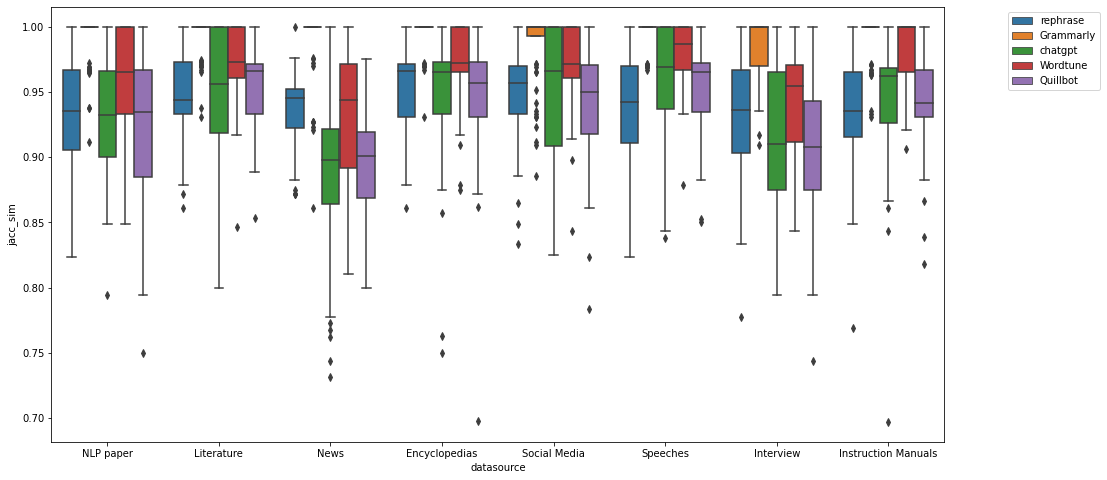

In [24]:
f = plt.subplots(1,figsize=(16,8))
a = sns.boxplot(y="jacc_sim",x= "datasource",hue="WATs", data=df_jaccsim_plot)
a.legend (bbox_to_anchor = (1.18, 1))